In [66]:
# Import dependencies
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pickle
import os

In [67]:
# Create folder for scaler and final machine learning model

path = "ML"

try: 
    os.mkdir(path) 
except OSError as error: 
    print("Oops, the folder already exists!") 

In [2]:
# Read in data
cleaned_df = pd.read_csv("Data/survey_df.csv")
cleaned_df

,id,Age,Gender,Country,state,self_employed,family_history,treatment,remote_work,tech_company
0,0,37,Female,United States,IL,No,No,Yes,No,Yes
1,1,44,Male,United States,IN,No,No,No,No,No
2,2,32,Male,Others,Non US,No,No,No,No,Yes
3,3,31,Male,Others,Non US,No,Yes,Yes,No,Yes
4,4,31,Male,United States,TX,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
1238,1254,26,Male,Others,Non US,No,No,Yes,No,Yes
1239,1255,32,Male,United States,IL,No,Yes,Yes,Yes,Yes
1240,1256,34,Male,United States,CA,No,Yes,Yes,No,Yes
1241,1257,46,Female,United States,NC,No,No,No,Yes,Yes


## Inspecting the dataset

In [3]:
# Check to see if dataset is balanced for target class column
cleaned_df["treatment"].value_counts()

Yes    628
No     615
Name: treatment, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_labels'

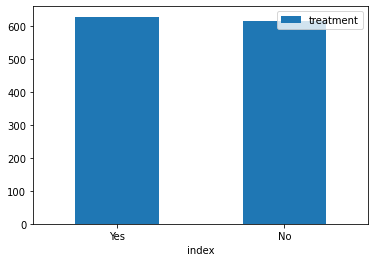

In [4]:
plot_df = pd.DataFrame(cleaned_df["treatment"].value_counts()).reset_index()


ax = plot_df.plot.bar(x='index', y='treatment', rot=0)
ax.bar_labels(ax.containers[0], labels=[f"{x/cleaned_df['treatment'].sum():.0%}" for x in cleaned_df['treatment']], padding=-20, color='w', fontsize=14)
plt.show()

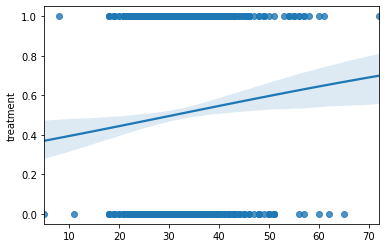

In [5]:
f, ax = plt.subplots()
sns.regplot(x=np.array(cleaned_df["Age"]), y=cleaned_df["treatment"].apply(lambda x: 0 if x=="No" else 1), logistic=True, ax=ax)
plt.show()

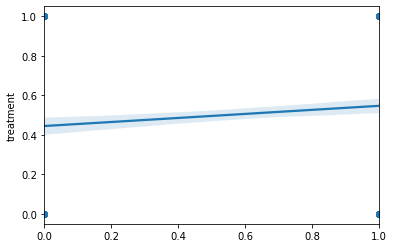

In [6]:
f, ax = plt.subplots()
sns.regplot(x=np.array(cleaned_df["Country"].map({"United States":1, "Others":0})), y=cleaned_df["treatment"].apply(lambda x: 0 if x=="No" else 1), logistic=True, ax=ax)
plt.show()

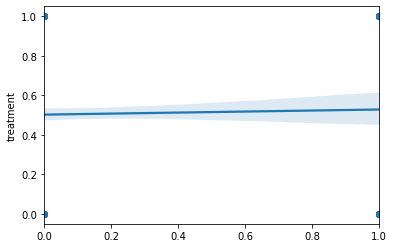

In [7]:
f, ax = plt.subplots()
sns.regplot(x=np.array(cleaned_df["self_employed"].map({"Yes":1, "No":0})), y=cleaned_df["treatment"].apply(lambda x: 0 if x=="No" else 1), logistic=True, ax=ax)
plt.show()

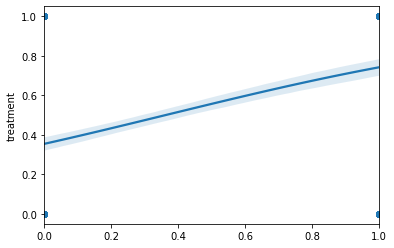

In [8]:
f, ax = plt.subplots()
sns.regplot(x=np.array(cleaned_df["family_history"].map({"Yes":1, "No":0})), y=cleaned_df["treatment"].apply(lambda x: 0 if x=="No" else 1), logistic=True, ax=ax)
plt.show()

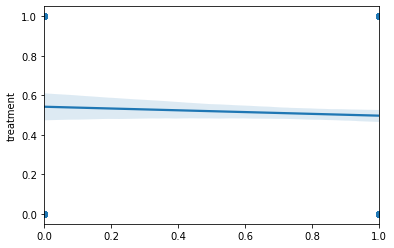

In [9]:
f, ax = plt.subplots()
sns.regplot(x=np.array(cleaned_df["tech_company"].map({"Yes":1, "No":0})), y=cleaned_df["treatment"].apply(lambda x: 0 if x=="No" else 1), logistic=True, ax=ax)
plt.show()

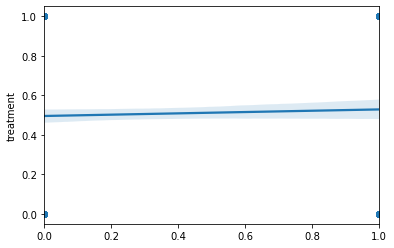

In [10]:
f, ax = plt.subplots()
sns.regplot(x=np.array(cleaned_df["remote_work"].map({"Yes":1, "No":0})), y=cleaned_df["treatment"].apply(lambda x: 0 if x=="No" else 1), logistic=True, ax=ax)
plt.show()

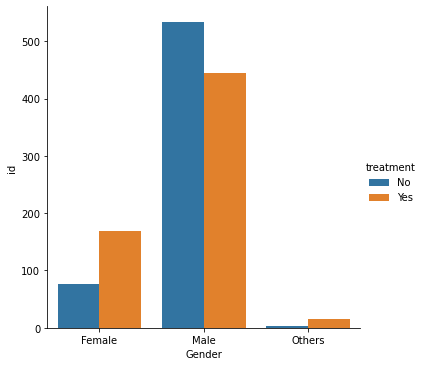

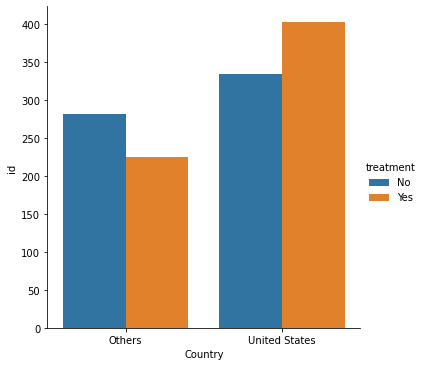

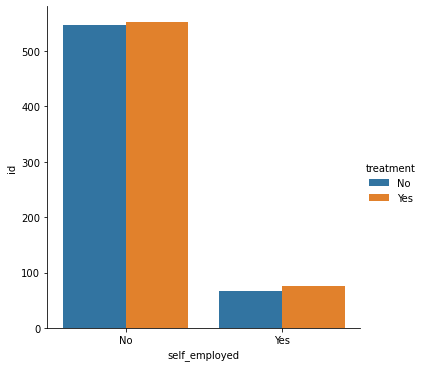

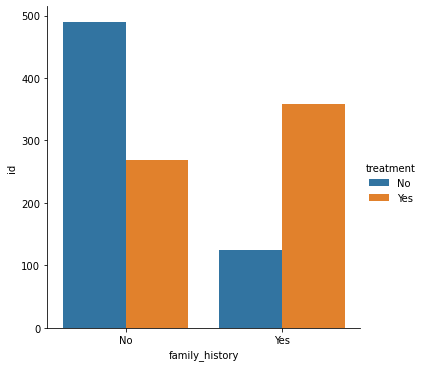

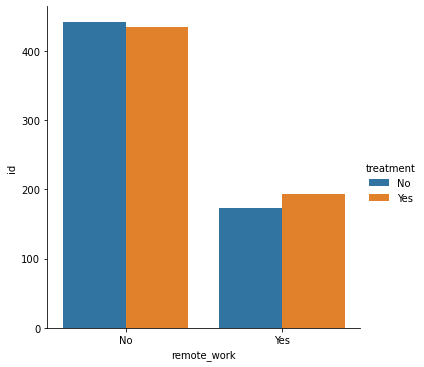

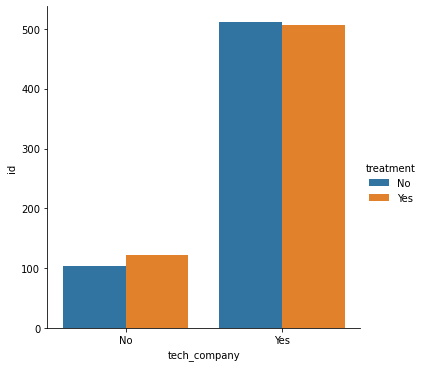

In [11]:
columns = ['Gender', 'Country', 'self_employed', 'family_history', 'remote_work', 'tech_company']

for c in columns:
    
    df_plot = pd.DataFrame(cleaned_df.groupby([c,"treatment"])['id'].count()).reset_index()

    sns.catplot(x = c,       # x variable name
                y = "id",       # y variable name
                hue = "treatment",  # group variable name
                data = df_plot,     # dataframe to plot
                kind = "bar")

## Preprocessing for machine learning

In [12]:
preprocessed_df = cleaned_df.drop(columns=["state", "id"])
preprocessed_df

,Age,Gender,Country,self_employed,family_history,treatment,remote_work,tech_company
0,37,Female,United States,No,No,Yes,No,Yes
1,44,Male,United States,No,No,No,No,No
2,32,Male,Others,No,No,No,No,Yes
3,31,Male,Others,No,Yes,Yes,No,Yes
4,31,Male,United States,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...
1238,26,Male,Others,No,No,Yes,No,Yes
1239,32,Male,United States,No,Yes,Yes,Yes,Yes
1240,34,Male,United States,No,Yes,Yes,No,Yes
1241,46,Female,United States,No,No,No,Yes,Yes


In [13]:
preprocessed_df["Country"] = preprocessed_df["Country"].map({"United States":1, "Others":0})
preprocessed_df["Country"].value_counts()

1    737
0    506
Name: Country, dtype: int64

In [14]:
preprocessed_df["self_employed"] = preprocessed_df["self_employed"].map({"Yes":1, "No":0})
preprocessed_df["self_employed"].value_counts()

0    1101
1     142
Name: self_employed, dtype: int64

In [15]:
preprocessed_df["family_history"] = preprocessed_df["family_history"].map({"Yes":1, "No":0})
preprocessed_df["family_history"].value_counts()

0    759
1    484
Name: family_history, dtype: int64

In [16]:
preprocessed_df["remote_work"] = preprocessed_df["remote_work"].map({"Yes":1, "No":0})
preprocessed_df["remote_work"].value_counts()

0    876
1    367
Name: remote_work, dtype: int64

In [17]:
preprocessed_df["tech_company"] = preprocessed_df["tech_company"].map({"Yes":1, "No":0})
preprocessed_df["tech_company"].value_counts()

1    1018
0     225
Name: tech_company, dtype: int64

In [18]:
# One-hot-encoding for gender
data_df = pd.get_dummies(data=preprocessed_df, columns=["Gender"])
data_df

,Age,Country,self_employed,family_history,treatment,remote_work,tech_company,Gender_Female,Gender_Male,Gender_Others
0,37,1,0,0,Yes,0,1,1,0,0
1,44,1,0,0,No,0,0,0,1,0
2,32,0,0,0,No,0,1,0,1,0
3,31,0,0,1,Yes,0,1,0,1,0
4,31,1,0,0,No,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1238,26,0,0,0,Yes,0,1,0,1,0
1239,32,1,0,1,Yes,1,1,0,1,0
1240,34,1,0,1,Yes,0,1,0,1,0
1241,46,1,0,0,No,1,1,1,0,0


In [19]:
# Establish X and y
X = data_df[["Age", "Country", "self_employed", "family_history", "remote_work", "tech_company", "Gender_Female", "Gender_Male", "Gender_Others"]]
y = data_df["treatment"]

In [20]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [21]:
# Scale the train and test features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.96078622, -1.20257816, -0.35632139, ..., -0.48080734,
         0.50602835, -0.12789718],
       [ 2.19099151,  0.83154678, -0.35632139, ..., -0.48080734,
         0.50602835, -0.12789718],
       [ 1.37085465, -1.20257816, -0.35632139, ...,  2.07983516,
        -1.97617387, -0.12789718],
       ...,
       [-0.40610854, -1.20257816, -0.35632139, ..., -0.48080734,
         0.50602835, -0.12789718],
       [ 0.27733884, -1.20257816, -0.35632139, ..., -0.48080734,
         0.50602835, -0.12789718],
       [ 1.50754413,  0.83154678,  2.80645514, ..., -0.48080734,
         0.50602835, -0.12789718]])

## Testing logistic regression

In [22]:
# Initiate a logistic regression for grid search
logistic_regression_tuner = LogisticRegression()

In [23]:
# Set parameters for grid search and initiate grid search
lg_param_grid = {"class_weight": [None, "balanced"], 
                "C":[0.25, 0.5, 1.0, 2.0, 4.0],
                "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lg_grid = GridSearchCV(logistic_regression_tuner, lg_param_grid, verbose=3)

In [24]:
lg_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ....C=0.25, class_weight=None, solver=newton-cg; total time=   0.1s
[CV 2/5] END ....C=0.25, class_weight=None, solver=newton-cg; total time=   0.0s
[CV 3/5] END ....C=0.25, class_weight=None, solver=newton-cg; total time=   0.0s
[CV 4/5] END ....C=0.25, class_weight=None, solver=newton-cg; total time=   0.0s
[CV 5/5] END ....C=0.25, class_weight=None, solver=newton-cg; total time=   0.0s
[CV 1/5] END ........C=0.25, class_weight=None, solver=lbfgs; total time=   0.0s
[CV 2/5] END ........C=0.25, class_weight=None, solver=lbfgs; total time=   0.0s
[CV 3/5] END ........C=0.25, class_weight=None, solver=lbfgs; total time=   0.0s
[CV 4/5] END ........C=0.25, class_weight=None, solver=lbfgs; total time=   0.0s
[CV 5/5] END ........C=0.25, class_weight=None, solver=lbfgs; total time=   0.0s
[CV 1/5] END ....C=0.25, class_weight=None, solver=liblinear; total time=   0.0s
[CV 2/5] END ....C=0.25, class_weight=None, sol

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.25, 0.5, 1.0, 2.0, 4.0],
                         'class_weight': [None, 'balanced'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=3)

In [25]:
print(lg_grid.best_params_)
print(lg_grid.best_score_)

{'C': 1.0, 'class_weight': None, 'solver': 'newton-cg'}
0.6964119372089013


In [26]:
## Multiple trials resulted in the below parameters yielding the best results on the test data
# Initiate logistic regression model
c=0.25
class_weight = "balanced"
solver="liblinear"

logistic_regression = LogisticRegression(C=c, class_weight=class_weight, solver=solver)
logistic_regression

LogisticRegression(C=0.25, class_weight='balanced', solver='liblinear')

In [27]:
# Train the logistic regression model
logistic_regression.fit(X_train_scaled, y_train)

LogisticRegression(C=0.25, class_weight='balanced', solver='liblinear')

In [28]:
# Make preditions
y_pred_lg = logistic_regression.predict(X_test_scaled)

In [29]:
# Compare training data with test data 
print(f"Training Data Score: {logistic_regression.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {logistic_regression.score(X_test_scaled, y_test)}")

Training Data Score: 0.6952789699570815
Testing Data Score: 0.6816720257234726


In [30]:
# Set the test score to a variable
lg_test_score = logistic_regression.score(X_test_scaled, y_test)
lg_test_score

0.6816720257234726

In [31]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

          No       0.62      0.76      0.68       140
         Yes       0.76      0.61      0.68       171

    accuracy                           0.68       311
   macro avg       0.69      0.69      0.68       311
weighted avg       0.70      0.68      0.68       311



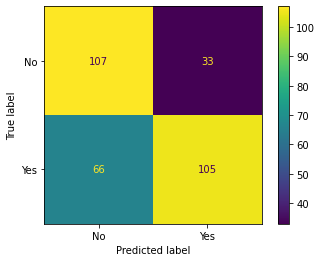

In [32]:
# Create a confusion matrix to illustrate model accuracy
logistic_regression_cm = confusion_matrix(y_test, y_pred_lg, labels=logistic_regression.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=logistic_regression_cm,
                              display_labels=logistic_regression.classes_)
disp.plot()
plt.show()

## Testing K Nearest Neighbor

k: 1, Train/Test Score: 0.788/0.611
k: 3, Train/Test Score: 0.753/0.617
k: 5, Train/Test Score: 0.735/0.640
k: 7, Train/Test Score: 0.718/0.659
k: 9, Train/Test Score: 0.707/0.682
k: 11, Train/Test Score: 0.710/0.675
k: 13, Train/Test Score: 0.686/0.691
k: 15, Train/Test Score: 0.692/0.695
k: 17, Train/Test Score: 0.695/0.669
k: 19, Train/Test Score: 0.697/0.669
k: 21, Train/Test Score: 0.697/0.691
k: 23, Train/Test Score: 0.695/0.707
k: 25, Train/Test Score: 0.693/0.701
k: 27, Train/Test Score: 0.694/0.682
k: 29, Train/Test Score: 0.692/0.685
k: 31, Train/Test Score: 0.689/0.685
k: 33, Train/Test Score: 0.695/0.698
k: 35, Train/Test Score: 0.696/0.701
k: 37, Train/Test Score: 0.696/0.704
k: 39, Train/Test Score: 0.697/0.701
k: 41, Train/Test Score: 0.691/0.691
k: 43, Train/Test Score: 0.689/0.691
k: 45, Train/Test Score: 0.693/0.695
k: 47, Train/Test Score: 0.693/0.698
k: 49, Train/Test Score: 0.689/0.695


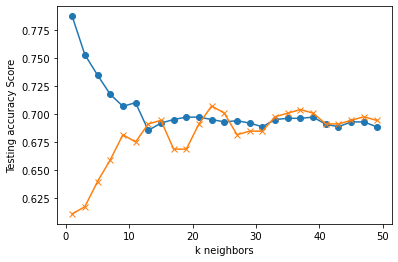

In [33]:
# Loop through different k values to find which has the highest accuracy.
train_scores = []
test_scores = []

for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [34]:
# Initiate a knn algorithm for grid search
knn_tuner = KNeighborsClassifier()

In [35]:
# Set parameters for grid search and initiate grid search
n_neighbors = 37

knn_param_grid = {"n_neighbors": [n_neighbors], 
                "weights" : ['uniform', 'distance'],
                "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_grid = GridSearchCV(knn_tuner, knn_param_grid, verbose=3)

In [36]:
knn_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END algorithm=auto, n_neighbors=37, weights=uniform; total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=37, weights=uniform; total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=37, weights=uniform; total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=37, weights=uniform; total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=37, weights=uniform; total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=37, weights=distance; total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=37, weights=distance; total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=37, weights=distance; total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=37, weights=distance; total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=37, weights=distance; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=37, weights=uniform; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_nei

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [37],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [37]:
print(knn_grid.best_params_)
print(knn_grid.best_score_)

{'algorithm': 'brute', 'n_neighbors': 37, 'weights': 'uniform'}
0.677074348801104


In [38]:
knn_best_params = knn_grid.best_params_
algorithm = knn_best_params["algorithm"]
weights = knn_best_params["weights"]
algorithm,weights

('brute', 'uniform')

In [39]:
# Run the model with k=37
knn = KNeighborsClassifier(n_neighbors=n_neighbors, algorithm=algorithm, weights=weights)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=37)

In [40]:
# Make preditions
y_pred_knn = knn.predict(X_test_scaled)

In [41]:
# Compare the training and testing scores
print("k=37")
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

k=37
Training Data Score: 0.6952789699570815
Testing Data Score: 0.7009646302250804


In [42]:
knn_test_score = knn.score(X_test_scaled, y_test)
knn_test_score

0.7009646302250804

In [43]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

          No       0.65      0.74      0.69       140
         Yes       0.76      0.67      0.71       171

    accuracy                           0.70       311
   macro avg       0.70      0.70      0.70       311
weighted avg       0.71      0.70      0.70       311



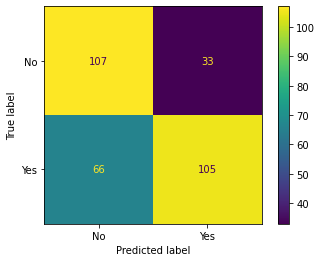

In [44]:
# Create a confusion matrix to illustrate model accuracy
knn_cm = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=knn_cm,
                              display_labels=knn.classes_)
disp.plot()
plt.show()

## Testing Random Forest

In [45]:
# Initialize a random forest model for grid search
random_forest_tuner = RandomForestClassifier()

In [46]:
param_grid = {"n_estimators": [10,20,50,100, 200, 300, 500], "max_depth" : [2,5,8,10,15]}
grid = GridSearchCV(random_forest_tuner, param_grid, verbose=3)

In [47]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ...................max_depth=2, n_estimators=10; total time=   0.0s
[CV 2/5] END ...................max_depth=2, n_estimators=10; total time=   0.0s
[CV 3/5] END ...................max_depth=2, n_estimators=10; total time=   0.0s
[CV 4/5] END ...................max_depth=2, n_estimators=10; total time=   0.0s
[CV 5/5] END ...................max_depth=2, n_estimators=10; total time=   0.0s
[CV 1/5] END ...................max_depth=2, n_estimators=20; total time=   0.0s
[CV 2/5] END ...................max_depth=2, n_estimators=20; total time=   0.0s
[CV 3/5] END ...................max_depth=2, n_estimators=20; total time=   0.0s
[CV 4/5] END ...................max_depth=2, n_estimators=20; total time=   0.0s
[CV 5/5] END ...................max_depth=2, n_estimators=20; total time=   0.0s
[CV 1/5] END ...................max_depth=2, n_estimators=50; total time=   0.0s
[CV 2/5] END ...................max_depth=2, n_

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 8, 10, 15],
                         'n_estimators': [10, 20, 50, 100, 200, 300, 500]},
             verbose=3)

In [48]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 2, 'n_estimators': 50}
0.6963889368063942


In [49]:
rf_best_params = grid.best_params_
max_depth = rf_best_params["max_depth"]
n_estimators = rf_best_params["n_estimators"]
max_depth,n_estimators

(2, 50)

In [50]:
random_forest = RandomForestClassifier(random_state=1, max_depth=max_depth, n_estimators=n_estimators).fit(X_train, y_train)

In [51]:
# Make preditions
y_pred_rf = random_forest.predict(X_test)

In [52]:
# Compare training data with test data 
print(f"Training Data Score: {random_forest.score(X_train, y_train)}")
print(f"Testing Data Score: {random_forest.score(X_test, y_test)}")

Training Data Score: 0.6963519313304721
Testing Data Score: 0.6977491961414791


In [53]:
# Assign accuracy score of random forest model to variable
rf_test_score = random_forest.score(X_test, y_test)
rf_test_score

0.6977491961414791

In [54]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

          No       0.65      0.71      0.68       140
         Yes       0.74      0.69      0.72       171

    accuracy                           0.70       311
   macro avg       0.70      0.70      0.70       311
weighted avg       0.70      0.70      0.70       311



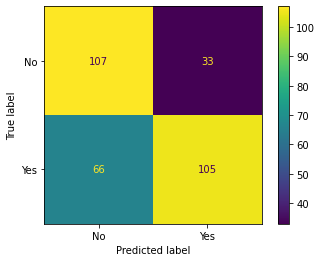

In [55]:
# Create a confusion matrix to illustrate model accuracy
rf_cm = confusion_matrix(y_test, y_pred_rf, labels=random_forest.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=rf_cm,
                              display_labels=random_forest.classes_)
disp.plot()
plt.show()

## Testing Support Vector Machines

In [56]:
svc_tuner = SVC()
svc_param_grid = {"kernel": ['linear', 'poly', 'rbf', 'sigmoid'], "C" : [0.25, 0.5, 1.0, 2.0, 4.0]}
svc_grid = GridSearchCV(svc_tuner, svc_param_grid, verbose=3)
svc_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..........................C=0.25, kernel=linear; total time=   0.0s
[CV 2/5] END ..........................C=0.25, kernel=linear; total time=   0.0s
[CV 3/5] END ..........................C=0.25, kernel=linear; total time=   0.0s
[CV 4/5] END ..........................C=0.25, kernel=linear; total time=   0.0s
[CV 5/5] END ..........................C=0.25, kernel=linear; total time=   0.0s
[CV 1/5] END ............................C=0.25, kernel=poly; total time=   0.0s
[CV 2/5] END ............................C=0.25, kernel=poly; total time=   0.0s
[CV 3/5] END ............................C=0.25, kernel=poly; total time=   0.0s
[CV 4/5] END ............................C=0.25, kernel=poly; total time=   0.0s
[CV 5/5] END ............................C=0.25, kernel=poly; total time=   0.0s
[CV 1/5] END .............................C=0.25, kernel=rbf; total time=   0.0s
[CV 2/5] END .............................C=0.2

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.25, 0.5, 1.0, 2.0, 4.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [57]:
print(svc_grid.best_params_)
print(svc_grid.best_score_)

{'C': 0.25, 'kernel': 'rbf'}
0.6953136679891898


In [58]:
# Fit to the training data, and validate with the testing data
svc_best_params = svc_grid.best_params_
c_svc = svc_best_params["C"]
kernel = svc_best_params["kernel"]
c_svc,kernel

(0.25, 'rbf')

In [59]:
svc = SVC(C=c, kernel=kernel)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)

In [60]:
# Compare training data with test data 
print(f"Training Data Score: {svc.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svc.score(X_test_scaled, y_test)}")

Training Data Score: 0.7006437768240343
Testing Data Score: 0.6913183279742765


In [61]:
# Assign accuracy score of SVC model to variable
svc_test_score = svc.score(X_test_scaled, y_test)
svc_test_score

0.6913183279742765

In [62]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

          No       0.65      0.69      0.67       140
         Yes       0.73      0.69      0.71       171

    accuracy                           0.69       311
   macro avg       0.69      0.69      0.69       311
weighted avg       0.69      0.69      0.69       311



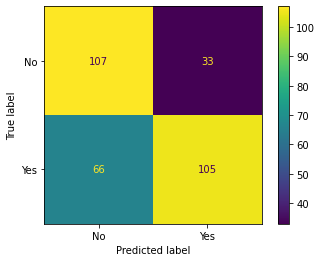

In [63]:
# Create a confusion matrix to illustrate model accuracy
svc_cm = confusion_matrix(y_test, y_pred_rf, labels=svc.classes_)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=rf_cm,
                              display_labels=svc.classes_)
disp.plot()
plt.show()

## Compare models to see which works best

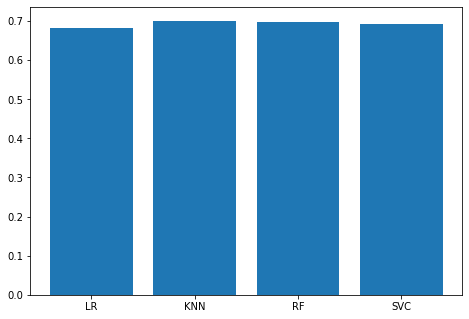

In [64]:
# Bar plot showing test scores for all three models
models = ["LR", "KNN", "RF", "SVC"]
test_scores = [lg_test_score, knn_test_score, rf_test_score, svc_test_score]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(models,test_scores)
plt.show()

In [68]:
scaler_filename = "ML/scaler.sav"
pickle.dump(scaler, open(scaler_filename, 'wb'))

model_filename = "ML/knn_model.sav"
pickle.dump(knn, open(model_filename, 'wb'))